In [124]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [125]:
df = sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [126]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [127]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [128]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.head())
print(y_train.head())

(120, 2)
(30, 2)
(120,)
(30,)
     sepal_length  sepal_width
126           6.2          2.8
23            5.1          3.3
64            5.6          2.9
117           7.7          3.8
84            5.4          3.0
126    2
23     0
64     1
117    2
84     1
Name: species, dtype: int64


In [130]:
clf =LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [131]:
clf.fit(X_train,y_train)

c:\Users\rohan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [132]:
y_pred = clf.predict(X_test)

In [133]:
print(accuracy_score(y_test,y_pred))

0.7666666666666667


In [134]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [135]:
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

c:\Users\rohan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.81064343e-01, 1.86837927e-02, 2.51864347e-04]])

In [136]:
clf.predict(query)

c:\Users\rohan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

c:\Users\rohan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


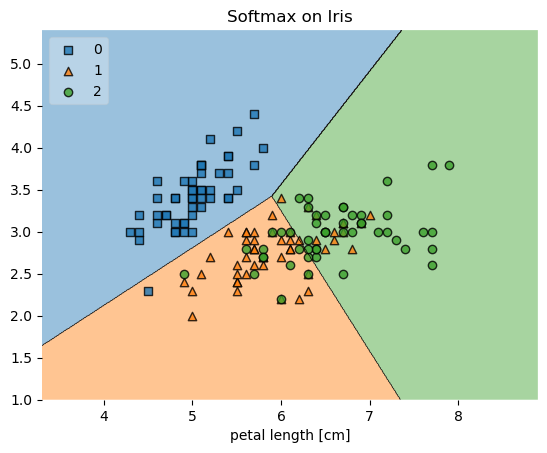

In [137]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()